# Plan

*  solu uno universo
*  precio de neg igual al ultimo oficial
* se calcular vend y comp activos según estado
* qutar variables clientes 


# Librerías y configuraciones generales

In [1]:
import pandas as pd
from random import randrange
import random
import math
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
import warnings

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Preprocesamiento 
* Carga datos de entrada

In [5]:
rango_lectura=['2020-10-09','2021-05-18']
rango_indice=['2020-09-09','2021-05-18']

In [6]:
base_rss = pd.read_csv (r'TranformacionBases_Java/Rss_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')
base_twitter = pd.read_csv (r'TranformacionBases_Java/Twitter_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [7]:
# rangos datos lecturas
print("rango rss: min: ",min(base_rss['date_adj']), " max: ",max(base_rss['date_adj']))
print("rango twitter: min: ",min(base_twitter['date']), " max: ",max(base_twitter['date']))

rango rss: min:  2020-10-09  max:  2021-05-18
rango twitter: min:  2020-10-05  max:  2021-05-30


In [8]:
datos_twitter=base_twitter[['id_fuente','date','polaridad']].groupby(['id_fuente','date']).mean().reset_index()
#datos_twitter

In [9]:
datos_twitter['date'] = pd.to_datetime(datos_twitter['date']).dt.date

In [10]:
datos_rss=base_rss[['fuenteRss','date','polaridad']].groupby(['fuenteRss','date']).mean().reset_index()
#datos_rss

In [11]:
datos_rss['date'] = pd.to_datetime(datos_rss['date']).dt.date

### Eliminar dias sin lecturas

In [12]:
## empezar desde el 9 de octubre

In [13]:
val_twitter=datos_twitter[['date','id_fuente']].groupby('date').count()

In [14]:
#val_twitter[val_twitter['id_fuente']<val_twitter['id_fuente'].mean()-(val_twitter['id_fuente'].std())*1.64]

In [15]:
val_rss=datos_rss[['date','fuenteRss']].groupby('date').count()
#val_rss

In [16]:
#val_rss[val_rss['fuenteRss']<val_rss['fuenteRss'].mean()-(val_rss['fuenteRss'].std())*1.7]

In [17]:
## fin validacion rss

In [18]:
fechas_quitar=list(val_twitter[val_twitter['id_fuente']<val_twitter['id_fuente'].mean()-(val_twitter['id_fuente'].std())*1.64].index)

In [19]:
fechas_quitar=fechas_quitar+list(val_rss[val_rss['fuenteRss']<val_rss['fuenteRss'].mean()-(val_rss['fuenteRss'].std())*1.7].index)

In [20]:
fechas_quitar

[datetime.date(2020, 10, 5),
 datetime.date(2020, 10, 6),
 datetime.date(2020, 10, 7),
 datetime.date(2020, 10, 8),
 datetime.date(2020, 10, 21),
 datetime.date(2020, 10, 22),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 10, 24),
 datetime.date(2021, 1, 9),
 datetime.date(2021, 3, 19),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 21),
 datetime.date(2020, 10, 13),
 datetime.date(2020, 10, 14),
 datetime.date(2020, 10, 15),
 datetime.date(2020, 10, 16),
 datetime.date(2020, 10, 17),
 datetime.date(2020, 10, 18),
 datetime.date(2020, 10, 19),
 datetime.date(2020, 10, 20),
 datetime.date(2020, 10, 21),
 datetime.date(2020, 10, 22),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 10, 24),
 datetime.date(2020, 12, 10),
 datetime.date(2021, 5, 18),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 10, 1)]

In [21]:
## eliminar duplicados

In [22]:
fechas_quitar = list(dict.fromkeys(fechas_quitar))

In [23]:
##igualar rangos

In [24]:
datos_trm=pd.read_csv (r'TranformacionBases_Java/TRM_total_adap_multi.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [25]:
datos_trm=datos_trm[datos_trm['date']>=rango_indice[0]]
datos_trm=datos_trm[datos_trm['date']<=rango_indice[1]]

In [26]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date_operacion,date
10514,9/9/2020,8/9/2020,3757.210,54.590,3,mar,0,0,2020-09-08,2020-09-09
10515,10/9/2020,9/9/2020,3717.250,-39.960,4,mié,0,0,2020-09-09,2020-09-10
10516,11/9/2020,10/9/2020,3700.280,-16.970,5,jue,0,0,2020-09-10,2020-09-11
10517,12/9/2020,11/9/2020,3709.000,8.720,6,vie,0,0,2020-09-11,2020-09-12
10518,13/9/2020,12/9/2020,3709.000,0.000,7,sáb,1,1,2020-09-12,2020-09-13
...,...,...,...,...,...,...,...,...,...,...
10761,14/5/2021,13/5/2021,3728.090,-6.000,5,jue,0,0,2021-05-13,2021-05-14
10762,15/5/2021,14/5/2021,3682.840,-45.250,6,vie,0,0,2021-05-14,2021-05-15
10763,16/5/2021,15/5/2021,3682.840,0.000,7,sáb,1,1,2021-05-15,2021-05-16
10764,17/5/2021,16/5/2021,3682.840,0.000,1,dom,1,1,2021-05-16,2021-05-17


In [27]:
datos_trm['date'] = pd.to_datetime(datos_trm['date']).dt.date

In [28]:
datos_twitter.columns=['fuente','date','polaridad']
datos_rss.columns=['fuente','date','polaridad']

In [29]:
#datos_rss

In [30]:
datos_lectura=datos_twitter.append(datos_rss)

In [31]:
#datos_lectura

In [32]:
pd.to_datetime(rango_lectura[0]).date()

datetime.date(2020, 10, 9)

In [33]:
#datos_lectura=datos_lectura[datos_lectura['date']>=rango_lectura[0]]
#datos_lectura=datos_lectura[datos_lectura['date']<=rango_lectura[1]]
datos_lectura=datos_lectura[datos_lectura['date']>=pd.to_datetime(rango_lectura[0]).date()]
datos_lectura=datos_lectura[datos_lectura['date']<=pd.to_datetime(rango_lectura[1]).date()]

In [34]:
datos_lectura=datos_lectura[datos_lectura['polaridad']!=0]

In [35]:
datos_lectura

,fuente,date,polaridad
0,BluRadioCo,2020-10-09,-0.347
1,BluRadioCo,2020-10-10,-0.272
2,BluRadioCo,2020-10-11,-0.636
3,BluRadioCo,2020-10-25,-0.249
4,BluRadioCo,2020-10-26,-0.410
...,...,...,...
109898,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.719
109899,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.960
109900,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.978
109901,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.883


<AxesSubplot:xlabel='date'>

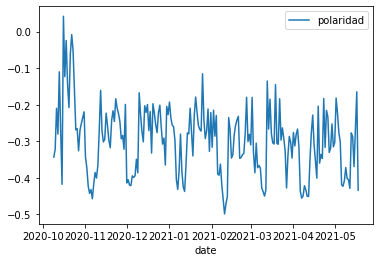

In [36]:
datos_lectura.groupby('date')[['polaridad']].mean().plot()

<AxesSubplot:xlabel='date'>

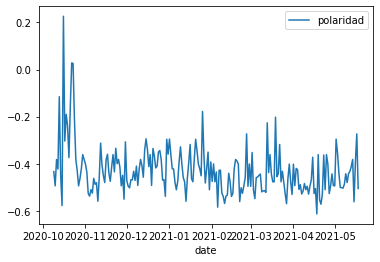

In [37]:
datos_lectura.groupby('date')[['polaridad']].median().plot()

<AxesSubplot:xlabel='date'>

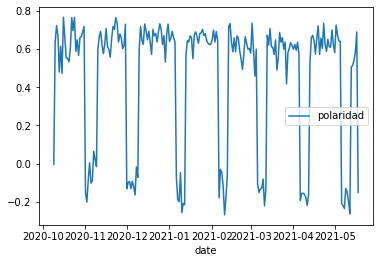

In [38]:
datos_lectura.groupby('date')[['polaridad']].quantile(0.9).plot()

<AxesSubplot:xlabel='date'>

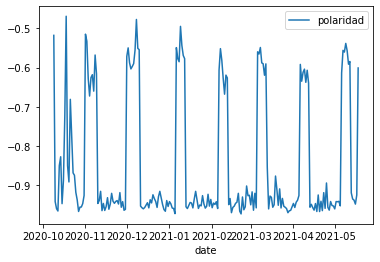

In [39]:
datos_lectura.groupby('date')[['polaridad']].quantile(0.1).plot()

## Carga Maestro Fuentes

In [40]:
base_maestro_fuentes = pd.read_csv (r'TranformacionBases_Java/maestro_fuentes.csv', engine='python', encoding = "ISO-8859-1", sep=';')

In [41]:
base_maestro_fuentes.reset_index()

,index,fuente,tipo
0,0,http://elnacional.com.do/feed/,rss
1,1,http://ep00.epimg.net/rss/economia/portada.xml,rss
2,2,http://ep00.epimg.net/rss/tags/ultimas_noticia...,rss
3,3,http://feeds.nytimes.com/nyt/rss/Business,rss
4,4,http://feeds.nytimes.com/nyt/rss/Technology,rss
...,...,...,...
132,132,elcolombiano,twitter
133,133,elespectador,twitter
134,134,lafm,twitter
135,135,rcnmundo,twitter


In [42]:
datos_lectura=datos_lectura.merge(base_maestro_fuentes.reset_index(), left_on='fuente', right_on='fuente', how='left')
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09,-0.347,118,twitter
1,BluRadioCo,2020-10-10,-0.272,118,twitter
2,BluRadioCo,2020-10-11,-0.636,118,twitter
3,BluRadioCo,2020-10-25,-0.249,118,twitter
4,BluRadioCo,2020-10-26,-0.410,118,twitter
...,...,...,...,...,...
78606,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.719,117,rss
78607,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.960,117,rss
78608,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.978,117,rss
78609,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.883,117,rss


In [43]:
datos_lectura

,fuente,date,polaridad,index,tipo
0,BluRadioCo,2020-10-09,-0.347,118,twitter
1,BluRadioCo,2020-10-10,-0.272,118,twitter
2,BluRadioCo,2020-10-11,-0.636,118,twitter
3,BluRadioCo,2020-10-25,-0.249,118,twitter
4,BluRadioCo,2020-10-26,-0.410,118,twitter
...,...,...,...,...,...
78606,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.719,117,rss
78607,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.960,117,rss
78608,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.978,117,rss
78609,https://www.reforma.com/rss/portada.xml,2021-05-05,-0.883,117,rss


## Calendario

In [44]:
calendario = pd.DataFrame({"Date": pd.date_range(rango_indice[0], rango_indice[1])})

In [45]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
247,2021-05-14
248,2021-05-15
249,2021-05-16
250,2021-05-17


In [46]:
### remover dias seleccionados
fechas_quitar

[datetime.date(2020, 10, 5),
 datetime.date(2020, 10, 6),
 datetime.date(2020, 10, 7),
 datetime.date(2020, 10, 8),
 datetime.date(2020, 10, 21),
 datetime.date(2020, 10, 22),
 datetime.date(2020, 10, 23),
 datetime.date(2020, 10, 24),
 datetime.date(2021, 1, 9),
 datetime.date(2021, 3, 19),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 21),
 datetime.date(2020, 10, 13),
 datetime.date(2020, 10, 14),
 datetime.date(2020, 10, 15),
 datetime.date(2020, 10, 16),
 datetime.date(2020, 10, 17),
 datetime.date(2020, 10, 18),
 datetime.date(2020, 10, 19),
 datetime.date(2020, 10, 20),
 datetime.date(2020, 12, 10),
 datetime.date(2021, 5, 18),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 10, 1)]

In [47]:
calendario=calendario[~calendario['Date'].isin(fechas_quitar)]

In [48]:
calendario=calendario.reset_index(drop=True)

In [49]:
calendario

,Date
0,2020-09-09
1,2020-09-10
2,2020-09-11
3,2020-09-12
4,2020-09-13
...,...
226,2021-05-13
227,2021-05-14
228,2021-05-15
229,2021-05-16


In [50]:
calendario['Date']=pd.to_datetime(calendario['Date']).dt.date

## Construcción nueva serie de valor del indice

In [51]:
datos_trm

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date_operacion,date
10514,9/9/2020,8/9/2020,3757.210,54.590,3,mar,0,0,2020-09-08,2020-09-09
10515,10/9/2020,9/9/2020,3717.250,-39.960,4,mié,0,0,2020-09-09,2020-09-10
10516,11/9/2020,10/9/2020,3700.280,-16.970,5,jue,0,0,2020-09-10,2020-09-11
10517,12/9/2020,11/9/2020,3709.000,8.720,6,vie,0,0,2020-09-11,2020-09-12
10518,13/9/2020,12/9/2020,3709.000,0.000,7,sáb,1,1,2020-09-12,2020-09-13
...,...,...,...,...,...,...,...,...,...,...
10761,14/5/2021,13/5/2021,3728.090,-6.000,5,jue,0,0,2021-05-13,2021-05-14
10762,15/5/2021,14/5/2021,3682.840,-45.250,6,vie,0,0,2021-05-14,2021-05-15
10763,16/5/2021,15/5/2021,3682.840,0.000,7,sáb,1,1,2021-05-15,2021-05-16
10764,17/5/2021,16/5/2021,3682.840,0.000,1,dom,1,1,2021-05-16,2021-05-17


In [52]:
#serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
#serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]

In [53]:
#reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
#rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

In [54]:
FECHA_INICIAL_PULSO=36

In [55]:
serieVariable=calendario.merge(datos_trm[['date','TRM']], left_on=['Date'], right_on=['date'],  how='left')

In [56]:
serieVariable=serieVariable[serieVariable.index<FECHA_INICIAL_PULSO][['TRM']]
serieVariable.columns=['valor']
serieVariable

,valor
0,3757.210
1,3717.250
2,3700.280
3,3709.000
4,3709.000
5,3709.000
6,3697.000
7,3683.490
8,3703.860
9,3714.650


# Agente

In [57]:
def crearAgente(id): #quizas falta el valor del var econ,
    agente={}
    agente['TIPO']='indefinido'
    agente['id']=id
    agente['edad']=0
    agente['capital']= randrange(1000,1000000000)
    agente['stockProducto']=randrange(10,1000000)
    agente['umbralStock']=randrange(10,1000000)
    #agente['habilidadAdministrativa']=random.uniform(-0.02, 0.5)
    agente['habilidadAdministrativa']=random.uniform(0.05, 0.15)
    #agente['tasaConsumo']=random.uniform(0.1, 0.5)
    """
    if agente['TIPO']=='Comprador':
        agente['rentabilidad']=random.uniform(0.1, 0.2)
    elif agente['TIPO']=='Vendedor':
        agente['rentabilidad']=random.uniform(0.1, 0.2)
    """
    agente['rentabilidad']=random.uniform(0.05, 0.15)
    agente['tamanoRegresion']= randrange(5,20)
    # perfilIntereses  No aplica
    agente['impactoTextos']=random.uniform(-1, 1)
    agente['estrategiaLectura']=[0]*NUM_FUENTES_INTERPRETACION
    agente['estrategiaLectura_imp']=[0]*NUM_FUENTES_INTERPRETACION
    for i in range(NUM_FUENTES_INTERPRETACION):
        agente['estrategiaLectura'][i]=randrange(NUM_FUENTES_TOTATALES)
        agente['estrategiaLectura_imp'][i]=random.random()
    agente['numeroDiasLecturas']=randrange(2,7)
    agente['umbralPronostico']=random.uniform(0.02, 0.15)
    agente['porcentajeCapitalCompra']=random.uniform(0, 1)
    agente['porcentajeStockVenta']=random.uniform(0, 1)
    #agente['costoMauc']  costo del commoditie según bolsa
    #agente['costosFijos']=random.uniform(0.1, 0.3)
    """agente['tasaProduccion']=random.uniform(0, 0.5)"""
    #agente['limiteSobrePrecio']=random.uniform(0.01, 0.3)
    agente['viveza']=random.uniform(0.05,0.9)
    #agente['vivezaVendedor']=random.uniform(0.05, 0.2)    
    agente['controlGastosEImpuestos']=random.uniform(0.05, 0.4)
    
    agentesCreados.append(agente)
    return agente

In [58]:
def pronosticoAgente_old(agente):    
    reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
    rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
    serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]

    modelo_agente=SimpleExpSmoothing(serie_indice_agente['TRM']).fit(smoothing_level=0.8,optimized=False)
    prediccion_base_agente=modelo_agente.forecast()

    prediccion_base_agente=prediccion_base_agente.values[0]
    df_lecura_agente=pd.DataFrame({'index':agente['estrategiaLectura'] , 'impacto': agente['estrategiaLectura_imp']})

    lect_inicio=FECHA_PULSO-agente['numeroDiasLecturas']
    rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]
    serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')

    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
    serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']
    
    #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    if len(serie_lectura_agente)>0 :
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        pronosticos_dia_siguiente=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    else:
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente
        pronosticos_dia_siguiente=prediccion_base_agente
        
    return pronosticos_dia_siguiente

In [59]:
def pronosticoAgente_old2(agente):    
    reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
    #rango_reg_agente=[calendario.iloc[reg_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]
    
    
    #serieVariable

    #serie_indice_agente=datos_trm[datos_trm['date']>=rango_reg_agente[0]]
    #serie_indice_agente=serie_indice_agente[serie_indice_agente['date']<=rango_reg_agente[1]]
    
    serie_indice_agente=serieVariable[reg_inicio:]
    
    

    modelo_agente=SimpleExpSmoothing(serie_indice_agente['valor']).fit(smoothing_level=0.8,optimized=False)
    prediccion_base_agente=modelo_agente.forecast()
    prediccion_base_agente=prediccion_base_agente.values[0]
    
       
    df_lecura_agente=pd.DataFrame({'index':agente['estrategiaLectura'] , 'impacto': agente['estrategiaLectura_imp']})

    lect_inicio=FECHA_PULSO-agente['numeroDiasLecturas']
    rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]
    serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')

    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
    serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']
    
    #print('serie ind agente:',serie_indice_agente, 'factor: ', serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    
    #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    if len(serie_lectura_agente)>0 :
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        pronosticos_dia_siguiente=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    else:
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente
        pronosticos_dia_siguiente=prediccion_base_agente
        
    return pronosticos_dia_siguiente

In [60]:
def pronosticoAgente(agente):    
    """
    reg_inicio=FECHA_PULSO-agente['tamanoRegresion']
   
    serie_indice_agente=serieVariable[reg_inicio:]
    modelo_agente=SimpleExpSmoothing(serie_indice_agente['valor']).fit(smoothing_level=0.8,optimized=False)
    prediccion_base_agente=modelo_agente.forecast()
    prediccion_base_agente=prediccion_base_agente.values[0]
    """   
       
    df_lecura_agente=pd.DataFrame({'index':agente['estrategiaLectura'] , 'impacto': agente['estrategiaLectura_imp']})
    lect_inicio=FECHA_PULSO-agente['numeroDiasLecturas']
    rango_lec_agente=[calendario.iloc[lect_inicio]['Date'],calendario.iloc[FECHA_PULSO]['Date']]

    serie_lectura_agente=datos_lectura[datos_lectura['date']>=rango_lec_agente[0]]
    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['date']<=rango_lec_agente[1]]
    serie_lectura_agente=serie_lectura_agente.merge(df_lecura_agente, left_on='index', right_on='index', how='left')

    serie_lectura_agente=serie_lectura_agente[serie_lectura_agente['impacto'].notnull()]
    serie_lectura_agente['factor']=serie_lectura_agente['polaridad']*serie_lectura_agente['impacto']
    
    #print('serie ind agente:',serie_indice_agente, 'factor: ', serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    
    #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    """
    if len(serie_lectura_agente)>0 :
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        pronosticos_dia_siguiente=prediccion_base_agente*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
    else:
        #agente['pronosticos_dia_siguiente']=prediccion_base_agente
        pronosticos_dia_siguiente=prediccion_base_agente
    """    
    # prediccion solo con las lecturas
    pronosticos_dia_siguiente=VALOR_MOMENTO_INDICE*(1+serie_lectura_agente['factor'].mean()*agente['impactoTextos'])
        
        
    return pronosticos_dia_siguiente

In [61]:
def activacionAgente(agente):
    
    #cuando
    agente['activo']=False
    agente['TIPO']='indefinido'
    agente['cantidadTransaccionar']=0
    #rol comprador
    if agente['pronosticos_dia_siguiente']>VALOR_MOMENTO_INDICE:
        #necesita stock?
        val_stock=agente['stockProducto']<agente['umbralStock']
         #el cambio del mercado le combiene?  prediccion - valor actual
        val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']*VALOR_MOMENTO_INDICE
        #agente['activo']=val_stock or val_conveniencia
        agente['activo']= val_conveniencia
        if agente['activo']:
            agente['TIPO']='comprador'
            agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']/VALOR_MOMENTO_INDICE ## revisar
            #agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])
            agente['precioNegociacion']=VALOR_MOMENTO_INDICE
            
    #rol vendedor
    if agente['pronosticos_dia_siguiente']<VALOR_MOMENTO_INDICE:
        #necesita stock?
        val_stock=agente['stockProducto']>agente['umbralStock']
        #el cambio del mercado le combiene?  prediccion - valor actual
        val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']*VALOR_MOMENTO_INDICE
        #agente['activo']=val_stock or val_conveniencia
        agente['activo']= val_conveniencia
        if agente['activo']:
            agente['TIPO']='vendedor'
            #cuanto vender
            agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']
            #agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])    
            agente['precioNegociacion']=VALOR_MOMENTO_INDICE
        
    #print(agente['id'], 'activo',agente['activo'],' tipo: ', agente['TIPO'], ' vi: ',VALOR_MOMENTO_INDICE, 'ps: ',agente['pronosticos_dia_siguiente'], 'up: ',agente['umbralPronostico'] ,'vup:',agente['umbralPronostico']*VALOR_MOMENTO_INDICE)    
    return agente['TIPO']

In [62]:
"""
def activacionVendedor(agente):
    #cuando vender
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']>agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto vender
    agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']
    #precio negociacion
    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1+agente['vivezaVendedor'])+VALOR_MOMENTO_INDICE
    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])    
    # los vendedores tienen la rentabilidad en le precio de negociación
    #agente['precioNegociacion']=agente['precioNegociacion']/(1-agente['rentabilidad'])
    
    return agente['activo']
"""

"\ndef activacionVendedor(agente):\n    #cuando vender\n    agente['activo']=False\n    #necesita stock?\n    val_stock=agente['stockProducto']>agente['umbralStock']\n    #el cambio del mercado le combiene?  prediccion - valor actual\n    val_conveniencia=(VALOR_MOMENTO_INDICE - agente['pronosticos_dia_siguiente'] ) > agente['umbralPronostico']\n    #alguna de las 2 situaciones\n    agente['activo']=val_stock or val_conveniencia\n    #cuanto vender\n    agente['cantidadTransaccionar']=agente['stockProducto']*agente['porcentajeStockVenta']\n    #precio negociacion\n    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1+agente['vivezaVendedor'])+VALOR_MOMENTO_INDICE\n    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])    \n    # los vendedores tienen la rentabilidad en le precio de negociación\n    #agente['precioNegociacio

In [63]:
"""
def activacionComprador(agente):
    #cuando
    agente['activo']=False
    #necesita stock?
    val_stock=agente['stockProducto']<agente['umbralStock']
    #el cambio del mercado le combiene?  prediccion - valor actual
    val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']
    #alguna de las 2 situaciones
    agente['activo']=val_stock or val_conveniencia
    #cuanto comprar
    agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']/VALOR_MOMENTO_INDICE ## revisar
    #precio negociacion
       
    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE
    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])
    
    return agente['activo']"""

"\ndef activacionComprador(agente):\n    #cuando\n    agente['activo']=False\n    #necesita stock?\n    val_stock=agente['stockProducto']<agente['umbralStock']\n    #el cambio del mercado le combiene?  prediccion - valor actual\n    val_conveniencia=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE) > agente['umbralPronostico']\n    #alguna de las 2 situaciones\n    agente['activo']=val_stock or val_conveniencia\n    #cuanto comprar\n    agente['cantidadTransaccionar']=agente['capital']*agente['porcentajeCapitalCompra']/VALOR_MOMENTO_INDICE ## revisar\n    #precio negociacion\n       \n    #agente['precioNegociacion']=(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+VALOR_MOMENTO_INDICE\n    agente['precioNegociacion']=abs(agente['pronosticos_dia_siguiente'] - VALOR_MOMENTO_INDICE)*(1-agente['viveza'])+min(VALOR_MOMENTO_INDICE,agente['pronosticos_dia_siguiente'])\n    \n    return agente['activo']"

In [64]:
def transaccionarAgente(agenteComprador,agenteVendedor):
    #id agentes
    idComprador=agenteComprador.get('id')
    idVendedor=agenteVendedor.get('id')    
    #definir cantidad transaccionar
    cantidadRequeridaComprador=agenteComprador['cantidadTransaccionar']
    cantidadDisponibleVendedor=agenteVendedor['cantidadTransaccionar']
    cantidadTransaccion= cantidadRequeridaComprador if cantidadRequeridaComprador<cantidadDisponibleVendedor else cantidadDisponibleVendedor
    #precio transaccion
    precioTransaccion=agenteVendedor['precioNegociacion']
    #comision=precioTransaccion*0.05
    #numeroPulsoActual
    #FECHA_PULSO
    
    #Cambio estado agentes
    #comprador
    #agenteComprador['capital']=agenteComprador['capital']-precioTransaccion*(1.05)*cantidadTransaccion  #incluye comision
    agenteComprador['capital']=agenteComprador['capital']-precioTransaccion*cantidadTransaccion  #incluye comision
    ##sin costo mauc
    agenteComprador['stockProducto']=agenteComprador['stockProducto']+cantidadTransaccion
    agenteComprador['cantidadTransaccionar']=agenteComprador['cantidadTransaccionar']-cantidadTransaccion
    #vendedor
    #agenteVendedor['capital']=agenteVendedor['capital']+precioTransaccion*(1.05)*cantidadTransaccion
    agenteVendedor['capital']=agenteVendedor['capital']+precioTransaccion*cantidadTransaccion
    agenteVendedor['stockProducto']=agenteVendedor['stockProducto']-cantidadTransaccion
    agenteVendedor['cantidadTransaccionar']=agenteVendedor['cantidadTransaccionar']-cantidadTransaccion
    #validar activacion agentes, retornar para acciones
    desactivarComprador=agenteComprador['cantidadTransaccionar']==0
    desactivarVendedor=agenteVendedor['cantidadTransaccionar']==0
    lineaTransaccion=[idComprador,idVendedor,cantidadTransaccion,precioTransaccion,FECHA_PULSO,CICLO]
    #lineaTransaccion=[idComprador,idVendedor,cantidadTransaccion,precioTransaccion,FECHA_PULSO]
    #return {'desact_comp':desactivarComprador, 'desact_vend':desactivarVendedor, 'lineaTransaccion':lineaTransaccion}
    return [desactivarComprador, desactivarVendedor, lineaTransaccion]

In [65]:
def vivirAgente_old(agente):
    #aprovecha unidades
    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']
    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #recibe capital
    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])
    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento
    #aumentar edad
    agente['edad']=agente['edad']+1

In [66]:
def vivirAgente(agente):
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #recibe capital
    #aprovecha unidades
    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']
    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas
    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])
    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento
    #aumentar edad
    agente['edad']=agente['edad']+1

In [67]:
"""
def vivirComprador(agente):
    #aprovecha unidades
    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']
    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #recibe capital
    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])
    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento
    #reevaluar costos fijos 
    #aumentar edad
    agente['edad']=agente['edad']+1
"""

"\ndef vivirComprador(agente):\n    #aprovecha unidades\n    unidadesAprovechadas=agente['habilidadAdministrativa']*agente['stockProducto']\n    agente['stockProducto']=agente['stockProducto']-unidadesAprovechadas\n    #tiene gastos\n    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])\n    #recibe capital\n    precioAprovechamiento=VALOR_MOMENTO_INDICE/(1-agente['rentabilidad'])\n    agente['capital']=agente['capital']+unidadesAprovechadas*precioAprovechamiento\n    #reevaluar costos fijos \n    #aumentar edad\n    agente['edad']=agente['edad']+1\n"

In [68]:
"""
def vivirVendedor(agente):
    #tiene gastos
    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])
    #le cuesta producir
    agente['capital']=agente['capital']*(1-agente['habilidadAdministrativa'])*agente['tasaProduccion']
    #aumenta el stock con lo producido
    agente['stockProducto']=agente['stockProducto']+agente['stockProducto']*agente['tasaProduccion']
    #aumenta edad
    agente['edad']=agente['edad']+1
"""

"\ndef vivirVendedor(agente):\n    #tiene gastos\n    agente['capital']=agente['capital']*(1-agente['controlGastosEImpuestos'])\n    #le cuesta producir\n    agente['capital']=agente['capital']*(1-agente['habilidadAdministrativa'])*agente['tasaProduccion']\n    #aumenta el stock con lo producido\n    agente['stockProducto']=agente['stockProducto']+agente['stockProducto']*agente['tasaProduccion']\n    #aumenta edad\n    agente['edad']=agente['edad']+1\n"

# Universo

In [69]:
#GENERACION ESPONTANEA UNIVERSO
def generacionEspontanea():     
    global NUMERO_ACUMULADO_AGENTES
    for i in range(POBLACION_INICIAL):
        NUMERO_ACUMULADO_AGENTES=NUMERO_ACUMULADO_AGENTES+1
        universo.append(crearAgente(NUMERO_ACUMULADO_AGENTES))
        """
        if(random.random()<=CANT_COMPRADORES):            
            compradores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Comprador'))
        else:
            vendedores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Vendedor'))"""

In [70]:
def quiebraEmpresas():
    #quiebraEmpresas  
    
    for ag in universo:
        capiltalEmpresa=ag['capital']
        valorStockEmpresa=ag['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("COMP capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraComp")
            universo.remove(ag)     
            agentesQuebrados.append(ag)
    
    """
    for comp in compradores:
        capiltalEmpresa=comp['capital']
        valorStockEmpresa=comp['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("COMP capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraComp")
            compradores.remove(comp)     
            agentesQuebrados.append(comp)
    
    
    for vend in vendedores:
        capiltalEmpresa=vend['capital']
        valorStockEmpresa=vend['stockProducto']*VALOR_MOMENTO_INDICE
        valorEmpresa=capiltalEmpresa+valorStockEmpresa        
        #print("VEND capemp:",capiltalEmpresa,' valemp:',valorEmpresa, ' limQuiebra:',LIMITE_QUIEBRA)
        if capiltalEmpresa<LIMITE_QUIEBRA or valorEmpresa<LIMITE_QUIEBRA :
            #print("entraVend")
            vendedores.remove(vend)
            agentesQuebrados.append(vend)"""

In [71]:
def nuevosAgentes():
    global NUMERO_ACUMULADO_AGENTES
    #num_nuevos_agentes=math.floor(random.uniform(0, MAX_GENERACION_AGENTES)*POBLACION_ACTUAL)
    #num_nuevos_agentes=math.floor(random.uniform(0, MAX_GENERACION_AGENTES)*POBLACION_ACTUAL)
    
    num_nuevos_agentes=POBLACION_INICIAL-POBLACION_ACTUAL
    
    print("max_generacion_agentes: ",MAX_GENERACION_AGENTES,"nuevos Agentes: ", num_nuevos_agentes, "pob actual: ",POBLACION_ACTUAL, "pob final: ",POBLACION_ACTUAL+num_nuevos_agentes)
    
    if num_nuevos_agentes>0:
        for i in range(POBLACION_ACTUAL,POBLACION_ACTUAL+num_nuevos_agentes):
            NUMERO_ACUMULADO_AGENTES=NUMERO_ACUMULADO_AGENTES+1
            universo.append(crearAgente(NUMERO_ACUMULADO_AGENTES))
            """
            if(random.random()<=CANT_COMPRADORES):
                compradores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Comprador'))
            else:
                vendedores.append(crearAgente(NUMERO_ACUMULADO_AGENTES,'Vendedor'))
            """
            #guardar en lista de agentes creados

In [72]:
def pronosticoUniverso():
    for ag in universo:
        #print(pronosticoAgente(comp))
        ag['pronosticos_dia_siguiente']=pronosticoAgente(ag)
    """
    for comp in compradores:
        #print(pronosticoAgente(comp))
        comp['pronosticos_dia_siguiente']=pronosticoAgente(comp)
    for vend in vendedores:
        #print(pronosticoAgente(vend))
        vend['pronosticos_dia_siguiente']=pronosticoAgente(vend)
    """

In [73]:
def activacionUniverso():
    global VALOR_MOMENTO_INDICE    
    global compradoresActivos
    global vendedoresActivos
    
    for ag in universo:
        auxActivacion=activacionAgente(ag)
        if auxActivacion=='comprador':
            compradoresActivos.append(ag)
        elif auxActivacion=='vendedor':
            vendedoresActivos.append(ag)
            
    num_comprador=len(compradoresActivos)
    num_vendedor=len(vendedoresActivos)  
    
    print("Act universo inicial numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
    
    while (num_comprador>num_vendedor*2) or (num_vendedor>num_comprador*2):  
        print("entra cambio de precio")
        compradoresActivos=[]
        vendedoresActivos=[]
        
        if (num_comprador>=num_vendedor*2):
            VALOR_MOMENTO_INDICE=VALOR_MOMENTO_INDICE*(1.02)
            
        elif (num_vendedor>=num_comprador*2):
            VALOR_MOMENTO_INDICE=VALOR_MOMENTO_INDICE*(0.98)
        
        #print('nc: ',num_comprador, 'nv: ',num_vendedor, 'vmi: ',VALOR_MOMENTO_INDICE)
        
        #activacion universon hasta encontrar el precio adecuado
        for ag in universo:
            auxActivacion=activacionAgente(ag)
            if auxActivacion=='comprador':
                compradoresActivos.append(ag)
            elif auxActivacion=='vendedor':
                vendedoresActivos.append(ag)
                
        num_comprador=len(compradoresActivos)
        num_vendedor=len(vendedoresActivos) 
        
        #print("Act universo iter numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
    
    #Activacion final por cambio según demanda oferta
    
    print("desp nivelacion antes de ajuste vi:",VALOR_MOMENTO_INDICE,' nc: ',len(compradoresActivos),'nv: ',len(vendedoresActivos))
    
    #posible validación con el cambio hasta igualar el número de vendedores y compradores  en otro script
    
    ajustePrecio= 0.05*(num_comprador-num_vendedor)/(num_comprador+num_vendedor)
    VALOR_MOMENTO_INDICE=VALOR_MOMENTO_INDICE*(1+ajustePrecio)
    
    
    compradoresActivos=[]
    vendedoresActivos=[]
    
    for ag in universo:
            auxActivacion=activacionAgente(ag)
            if auxActivacion=='comprador':
                compradoresActivos.append(ag)
            elif auxActivacion=='vendedor':
                vendedoresActivos.append(ag)
     
    print("precio final activacion:",VALOR_MOMENTO_INDICE, ' ajuste aplicado: ',ajustePrecio,' nc: ',len(compradoresActivos),'nv: ',len(vendedoresActivos))
    """
    for comp in compradores:
        #print(pronosticoAgente(comp))
        auxActivacion=activacionComprador(comp)
        if auxActivacion:
            compradoresActivos.append(comp)
    for vend in vendedores:
        #print(pronosticoAgente(vend))
        auxActivacion=activacionVendedor(vend)
        if auxActivacion:
            vendedoresActivos.append(vend)"""

In [74]:
### Función transaccionar
def transaccionarUniverso_old():
    random.shuffle(compradoresActivos)
    
    while (len(compradoresActivos)>0 and len(vendedoresActivos)>0):
        for comp in compradoresActivos:     
            if len(vendedoresActivos)==0:
                #print("no hay vendedores")
                break

            df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values('precioNegociacion')
            mejorVendedor=next(item for item in vendedoresActivos if item['id'] == df_ofertas.iloc[0]['id'])
            compradorMomento=comp
            
            """
            (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
            if desactivarComprador:
                compradoresActivos.remove(compradorMomento)
            if desactivarVendedor:
                vendedoresActivos.remove(mejorVendedor) 
                #registra la transacción
            DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion"""
            
            precioMaximoCompra=compradorMomento['precioNegociacion']
            precioMinimoVenta=mejorVendedor['precioNegociacion']
            #selecciona si puede transaccionar
            
            #print("aqui pasa 1")
            if precioMaximoCompra>precioMinimoVenta:
                #print("transaccionar")
                #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
                (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
                #agregar transaccion a arreglo de transacciones con datos principales
                if desactivarComprador:
                    compradoresActivos.remove(compradorMomento)
                if desactivarVendedor:
                    vendedoresActivos.remove(mejorVendedor) 
                #registra la transacción
                DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion
            else :
                compradoresActivos.remove(compradorMomento)
           

In [75]:
### Función transaccionar
def transaccionarUniverso():
    random.shuffle(compradoresActivos)
    random.shuffle(vendedoresActivos)    
    
    while (len(compradoresActivos)>0 and len(vendedoresActivos)>0):
        for comp in compradoresActivos:     
            if len(vendedoresActivos)==0:
                #print("no hay vendedores")
                break

            #df_ofertas=pd.DataFrame.from_dict(vendedoresActivos).sort_values('precioNegociacion')
            #mejorVendedor=next(item for item in vendedoresActivos if item['id'] == df_ofertas.iloc[0]['id'])
            mejorVendedor=vendedoresActivos[0]
            compradorMomento=comp
            
            precioMaximoCompra=compradorMomento['precioNegociacion']
            precioMinimoVenta=mejorVendedor['precioNegociacion']
            
            #transaccionar orden aleatorio
            #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
            (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
            #agregar transaccion a arreglo de transacciones con datos principales
            if desactivarComprador:
                compradoresActivos.remove(compradorMomento)
            if desactivarVendedor:
                vendedoresActivos.remove(mejorVendedor) 
            #registra la transacción
            DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion
            
            
            
            
            
            """
            #print("aqui pasa 1")
            if precioMaximoCompra>precioMinimoVenta:
                #print("transaccionar")
                #puede desactivar algun vendedor, antes de pasar a las siguientes transacciones
                (desactivarComprador, desactivarVendedor, lineaTransaccion)=transaccionarAgente(compradorMomento,mejorVendedor)
                #agregar transaccion a arreglo de transacciones con datos principales
                if desactivarComprador:
                    compradoresActivos.remove(compradorMomento)
                if desactivarVendedor:
                    vendedoresActivos.remove(mejorVendedor) 
                #registra la transacción
                DF_TRANSACCIONES.loc[len(DF_TRANSACCIONES)]=lineaTransaccion
            else :
                compradoresActivos.remove(compradorMomento)"""
           

In [76]:
def vivirUniverso():
    for ag in universo:
        vivirAgente(ag)
    """
    for comp in compradores:
        vivirComprador(comp)
    for vend in vendedores:
        vivirVendedor(vend)"""

# SIMULACION

## Parametros Globales

In [77]:
#AGENTES
NUM_FUENTES_TOTATALES=137
NUM_FUENTES_INTERPRETACION=5

In [78]:
#UNIVERSO
#POBLACION_INICIAL=50
POBLACION_INICIAL=200
"""CANT_COMPRADORES=0.6"""

#LIMITE_QUIEBRA=1000
LIMITE_QUIEBRA=10000000
#MAX_GENERACION_AGENTES=0.02
MAX_GENERACION_AGENTES=0.05

POBLACION_ACTUAL=0

In [79]:
FECHA_INICIAL_PULSO=36
FECHA_PULSO=FECHA_INICIAL_PULSO   #fecha inicial con información suficiente

In [80]:
NUMERO_ACUMULADO_AGENTES=0

In [81]:
#tipo_indice='real'
tipo_indice='emergente'

In [82]:
VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']

In [83]:
#VALOR_MOMENTO_INDICE

In [84]:
DF_TRANSACCIONES=pd.DataFrame(columns=['idComprador','idVendedor','cantidadTransaccion','precioTransaccion','fechaPulso','ciclo']) ###llevar antes al algoritmo

In [85]:
#no aplica
"""compradores=[]
vendedores=[]"""
universo=[]

In [86]:
NUMERO_ACUMULADO_AGENTES

0

In [87]:
agentesQuebrados=[]

In [88]:
agentesCreados=[]

In [89]:
generacionEspontanea()

In [90]:
print("numAgentes: ",len(universo))

numAgentes:  200


In [91]:
##  Variable para realizar ciclos
CICLO=1

### ciclos simulacion

In [92]:
252-FECHA_PULSO

216

In [93]:
#pensar en agregar un número fijo de agentes

In [94]:
"""
aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']*aux_df_agentC['capital']
aux_df_agentC['pulso']=FECHA_PULSO-1
aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']*aux_df_agentV['capital']
aux_df_agentV['pulso']=FECHA_PULSO-1
df_estadoAgentes=aux_df_agentC
df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
df_estadoAgentes['ciclo']=CICLO
df_estadoAgentes"""

"\naux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]\naux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE\naux_df_agentC['val_empresa']=aux_df_agentC['val_stock']*aux_df_agentC['capital']\naux_df_agentC['pulso']=FECHA_PULSO-1\naux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]\naux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE\naux_df_agentV['val_empresa']=aux_df_agentV['val_stock']*aux_df_agentV['capital']\naux_df_agentV['pulso']=FECHA_PULSO-1\ndf_estadoAgentes=aux_df_agentC\ndf_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)\ndf_estadoAgentes['ciclo']=CICLO\ndf_estadoAgentes"

In [95]:
aux_df_agent=pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']]
aux_df_agent['val_stock']=aux_df_agent['stockProducto']*VALOR_MOMENTO_INDICE
aux_df_agent['val_empresa']=aux_df_agent['val_stock']+aux_df_agent['capital']
aux_df_agent['pulso']=FECHA_PULSO-1
aux_df_agent['ciclo']=CICLO
df_estadoAgentes=aux_df_agent

In [96]:
df_estadoAgentes

,id,TIPO,edad,capital,stockProducto,val_stock,val_empresa,pulso,ciclo
0,1,indefinido,0,4691502,665823,2569117994.880,2573809496.880,35,1
1,2,indefinido,0,330585891,226292,873161259.520,1203747150.520,35,1
2,3,indefinido,0,781619165,389778,1503981799.680,2285600964.680,35,1
3,4,indefinido,0,149383662,396224,1528854077.440,1678237739.440,35,1
4,5,indefinido,0,944148698,743865,2870247734.400,3814396432.400,35,1
...,...,...,...,...,...,...,...,...,...
195,196,indefinido,0,983198821,317168,1223811758.080,2207010579.080,35,1
196,197,indefinido,0,34581447,894101,3449942354.560,3484523801.560,35,1
197,198,indefinido,0,144588715,505155,1949170876.800,2093759591.800,35,1
198,199,indefinido,0,14560437,782352,3018752133.120,3033312570.120,35,1


In [97]:
#df_estadoAgentes=pd.DataFrame.from_dict(compradores)
#df_estadoAgentes=df_estadoAgentes.append(pd.DataFrame.from_dict(vendedores))

# Validación ciclo

In [98]:
#aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
#aux_df_transacciones

In [99]:
"""
if tipo_indice=='real' or len(aux_df_transacciones)==0:
    print('trm real')
    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
elif tipo_indice=='emergente':
    print('trm simuladas')
    aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']
    #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
    VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
"""

"\nif tipo_indice=='real' or len(aux_df_transacciones)==0:\n    print('trm real')\n    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']\nelif tipo_indice=='emergente':\n    print('trm simuladas')\n    aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']\n    #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()\n    VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()\n"

In [100]:
#VALOR_MOMENTO_INDICE

In [101]:
#POBLACION_ACTUAL=len(universo)
#POBLACION_ACTUAL

In [102]:
#quiebraEmpresas()

In [103]:
#len(agentesQuebrados)

In [104]:
#POBLACION_ACTUAL=len(universo)
#POBLACION_ACTUAL

In [105]:
#nuevosAgentes()

In [106]:
#pronosticoUniverso()

In [107]:
#pd.DataFrame.from_dict(universo)['pronosticos_dia_siguiente'].describe()

In [108]:
#compradoresActivos=[]
#vendedoresActivos=[]

In [109]:
#activacionUniverso()

In [110]:
#pd.DataFrame.from_dict(universo)['activo'].value_counts()

In [111]:
#pd.DataFrame.from_dict(universo)['TIPO'].value_counts()

In [112]:
#print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

In [113]:
#pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']].describe()

In [114]:
#transaccionarUniverso()

In [115]:
#pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']].describe()

In [116]:
#vivirUniverso()

In [117]:
#pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']].describe()

In [118]:
#quizas no vender aprovechar stock,  baja el stock y aumenta el capital

# Fin validación

In [119]:
#for generacion in range(0,100,1):
for generacion in range(0,len(calendario)-FECHA_INICIAL_PULSO,1):
    aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
    
    print("fecha pulso ",FECHA_PULSO-1, ' trans dia anterior', len(aux_df_transacciones) )
    
    #if tipo_indice=='real' or generacion==0 or len(aux_df_transacciones)==0:
    if tipo_indice=='real' or len(aux_df_transacciones)==0:
        print('trm real')
        VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
    elif tipo_indice=='emergente':
        print('trm simuladas')
        aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']
        #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
        VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
    
    #df_length = len(serieVariable)
    #serieVariable.loc[df_length]=[VALOR_MOMENTO_INDICE]
    serieVariable.loc[FECHA_PULSO]=[VALOR_MOMENTO_INDICE]
    
    print('fechaPulso',FECHA_PULSO,'valor momento: ',VALOR_MOMENTO_INDICE)
    
    POBLACION_ACTUAL=len(universo)    
    quiebraEmpresas()# capturar información de agentes quebrados
    POBLACION_ACTUAL=len(universo) 
    print("PULSO: ",FECHA_PULSO, "Generacion: ",generacion, " poblacion actual: ",POBLACION_ACTUAL,' numero acumulado agentes: ',NUMERO_ACUMULADO_AGENTES)
    nuevosAgentes()
    #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))
    pronosticoUniverso()
    
    #promedio pronosticos
    #print('pron medio: ',pd.DataFrame.from_dict(universo)[['pronosticos_dia_siguiente']].describe())
    
    compradoresActivos=[]
    vendedoresActivos=[]
    activacionUniverso()
    print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos), " val indice: ", VALOR_MOMENTO_INDICE)
    transaccionarUniverso()
    print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos), " val indice: ", VALOR_MOMENTO_INDICE)
    vivirUniverso()
    #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores) )
    ## capturar estado empresas
    aux_df_agent=pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']]
    aux_df_agent['val_stock']=aux_df_agent['stockProducto']*VALOR_MOMENTO_INDICE
    aux_df_agent['val_empresa']=aux_df_agent['val_stock']+aux_df_agent['capital']
    aux_df_agent['pulso']=FECHA_PULSO
    aux_df_agent['ciclo']=CICLO
    df_estadoAgentes=df_estadoAgentes.append(aux_df_agent)
    
    #serieVariable
    
    """
    if len(compradores)>0:
        aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']+aux_df_agentC['capital']
        aux_df_agentC['pulso']=FECHA_PULSO
        aux_df_agentC['ciclo']=CICLO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agentC)
        
    if len(vendedores)>0:
        aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']+aux_df_agentV['capital']
        aux_df_agentV['pulso']=FECHA_PULSO
        aux_df_agentV['ciclo']=CICLO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
     """   
    FECHA_PULSO=FECHA_PULSO+1

fecha pulso  35  trans dia anterior 0
trm real
fechaPulso 36 valor momento:  3858.56
PULSO:  36 Generacion:  0  poblacion actual:  197  numero acumulado agentes:  200
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  197 pob final:  200
Act universo inicial numCompradoresActivos:  33 numVendedoresActivos:  22
desp nivelacion antes de ajuste vi: 3858.56  nc:  33 nv:  22
precio final activacion: 3897.1456  ajuste aplicado:  0.01  nc:  30 nv:  22
numCompradoresActivos:  30 numVendedoresActivos:  22  val indice:  3897.1456
numCompradoresActivos:  0 numVendedoresActivos:  15  val indice:  3897.1456
fecha pulso  36  trans dia anterior 37
trm simuladas
fechaPulso 37 valor momento:  3897.145599999999
PULSO:  37 Generacion:  1  poblacion actual:  200  numero acumulado agentes:  203
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  200 pob final:  200
Act universo inicial numCompradoresActivos:  34 numVendedoresActivos:  20
desp nivelacion antes de ajuste vi: 3897.1455999

Act universo inicial numCompradoresActivos:  36 numVendedoresActivos:  25
desp nivelacion antes de ajuste vi: 4098.61117586494  nc:  36 nv:  25
precio final activacion: 4135.565866794871  ajuste aplicado:  0.009016393442622951  nc:  32 nv:  30
numCompradoresActivos:  32 numVendedoresActivos:  30  val indice:  4135.565866794871
numCompradoresActivos:  26 numVendedoresActivos:  0  val indice:  4135.565866794871
fecha pulso  48  trans dia anterior 36
trm simuladas
fechaPulso 49 valor momento:  4135.565866794871
PULSO:  49 Generacion:  13  poblacion actual:  200  numero acumulado agentes:  204
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  200 pob final:  200
Act universo inicial numCompradoresActivos:  34 numVendedoresActivos:  22
desp nivelacion antes de ajuste vi: 4135.565866794871  nc:  34 nv:  22
precio final activacion: 4179.875501081959  ajuste aplicado:  0.010714285714285716  nc:  30 nv:  29
numCompradoresActivos:  30 numVendedoresActivos:  29  val indice:  4179.8755

Act universo inicial numCompradoresActivos:  35 numVendedoresActivos:  29
desp nivelacion antes de ajuste vi: 4609.3722049378175  nc:  35 nv:  29
precio final activacion: 4630.978637148463  ajuste aplicado:  0.004687500000000001  nc:  35 nv:  30
numCompradoresActivos:  35 numVendedoresActivos:  30  val indice:  4630.978637148463
numCompradoresActivos:  29 numVendedoresActivos:  0  val indice:  4630.978637148463
fecha pulso  61  trans dia anterior 36
trm simuladas
fechaPulso 62 valor momento:  4630.978637148464
PULSO:  62 Generacion:  26  poblacion actual:  199  numero acumulado agentes:  218
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  199 pob final:  200
Act universo inicial numCompradoresActivos:  38 numVendedoresActivos:  29
desp nivelacion antes de ajuste vi: 4630.978637148464  nc:  38 nv:  29
precio final activacion: 4662.082225009909  ajuste aplicado:  0.006716417910447761  nc:  35 nv:  31
numCompradoresActivos:  35 numVendedoresActivos:  31  val indice:  4662.08

Act universo inicial numCompradoresActivos:  25 numVendedoresActivos:  11
entra cambio de precio
desp nivelacion antes de ajuste vi: 5427.694004947451  nc:  21 nv:  12
precio final activacion: 5501.708014105825  ajuste aplicado:  0.013636363636363637  nc:  19 nv:  15
numCompradoresActivos:  19 numVendedoresActivos:  15  val indice:  5501.708014105825
numCompradoresActivos:  15 numVendedoresActivos:  0  val indice:  5501.708014105825
fecha pulso  74  trans dia anterior 19
trm simuladas
fechaPulso 75 valor momento:  5501.708014105825
PULSO:  75 Generacion:  39  poblacion actual:  196  numero acumulado agentes:  258
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  196 pob final:  200
Act universo inicial numCompradoresActivos:  26 numVendedoresActivos:  11
entra cambio de precio
desp nivelacion antes de ajuste vi: 5611.742174387941  nc:  21 nv:  11
precio final activacion: 5699.425645862753  ajuste aplicado:  0.015625  nc:  18 nv:  15
numCompradoresActivos:  18 numVendedoresA

Act universo inicial numCompradoresActivos:  43 numVendedoresActivos:  26
desp nivelacion antes de ajuste vi: 6666.223517230885  nc:  43 nv:  26
precio final activacion: 6748.343662008367  ajuste aplicado:  0.012318840579710146  nc:  41 nv:  31
numCompradoresActivos:  41 numVendedoresActivos:  31  val indice:  6748.343662008367
numCompradoresActivos:  30 numVendedoresActivos:  0  val indice:  6748.343662008367
fecha pulso  86  trans dia anterior 42
trm simuladas
fechaPulso 87 valor momento:  6748.343662008366
PULSO:  87 Generacion:  51  poblacion actual:  197  numero acumulado agentes:  305
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  197 pob final:  200
Act universo inicial numCompradoresActivos:  39 numVendedoresActivos:  25
desp nivelacion antes de ajuste vi: 6748.343662008366  nc:  39 nv:  25
precio final activacion: 6822.153670811583  ajuste aplicado:  0.010937500000000001  nc:  37 nv:  27
numCompradoresActivos:  37 numVendedoresActivos:  27  val indice:  6822.153

Act universo inicial numCompradoresActivos:  44 numVendedoresActivos:  27
desp nivelacion antes de ajuste vi: 7699.883242867621  nc:  44 nv:  27
precio final activacion: 7792.064943662516  ajuste aplicado:  0.011971830985915494  nc:  42 nv:  31
numCompradoresActivos:  42 numVendedoresActivos:  31  val indice:  7792.064943662516
numCompradoresActivos:  36 numVendedoresActivos:  0  val indice:  7792.064943662516
fecha pulso  99  trans dia anterior 37
trm simuladas
fechaPulso 100 valor momento:  7792.064943662516
PULSO:  100 Generacion:  64  poblacion actual:  198  numero acumulado agentes:  349
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  198 pob final:  200
Act universo inicial numCompradoresActivos:  46 numVendedoresActivos:  24
desp nivelacion antes de ajuste vi: 7792.064943662516  nc:  46 nv:  24
precio final activacion: 7914.511678491499  ajuste aplicado:  0.015714285714285715  nc:  39 nv:  31
numCompradoresActivos:  39 numVendedoresActivos:  31  val indice:  7914.5

Act universo inicial numCompradoresActivos:  45 numVendedoresActivos:  27
desp nivelacion antes de ajuste vi: 9156.25144106153  nc:  45 nv:  27
precio final activacion: 9270.704584074798  ajuste aplicado:  0.0125  nc:  40 nv:  35
numCompradoresActivos:  40 numVendedoresActivos:  35  val indice:  9270.704584074798
numCompradoresActivos:  25 numVendedoresActivos:  0  val indice:  9270.704584074798
fecha pulso  112  trans dia anterior 50
trm simuladas
fechaPulso 113 valor momento:  9270.7045840748
PULSO:  113 Generacion:  77  poblacion actual:  197  numero acumulado agentes:  390
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  197 pob final:  200
Act universo inicial numCompradoresActivos:  45 numVendedoresActivos:  29
desp nivelacion antes de ajuste vi: 9270.7045840748  nc:  45 nv:  29
precio final activacion: 9370.928417416148  ajuste aplicado:  0.010810810810810811  nc:  43 nv:  35
numCompradoresActivos:  43 numVendedoresActivos:  35  val indice:  9370.928417416148
numCom

Act universo inicial numCompradoresActivos:  48 numVendedoresActivos:  21
entra cambio de precio
desp nivelacion antes de ajuste vi: 11229.406948268952  nc:  38 nv:  28
precio final activacion: 11314.478213028566  ajuste aplicado:  0.007575757575757576  nc:  35 nv:  30
numCompradoresActivos:  35 numVendedoresActivos:  30  val indice:  11314.478213028566
numCompradoresActivos:  21 numVendedoresActivos:  0  val indice:  11314.478213028566
fecha pulso  124  trans dia anterior 44
trm simuladas
fechaPulso 125 valor momento:  11314.478213028566
PULSO:  125 Generacion:  89  poblacion actual:  196  numero acumulado agentes:  421
max_generacion_agentes:  0.05 nuevos Agentes:  4 pob actual:  196 pob final:  200
Act universo inicial numCompradoresActivos:  52 numVendedoresActivos:  23
entra cambio de precio
desp nivelacion antes de ajuste vi: 11540.767777289137  nc:  43 nv:  32
precio final activacion: 11625.400074322592  ajuste aplicado:  0.007333333333333334  nc:  40 nv:  33
numCompradoresActiv

Act universo inicial numCompradoresActivos:  47 numVendedoresActivos:  21
entra cambio de precio
desp nivelacion antes de ajuste vi: 15080.281002767151  nc:  40 nv:  24
precio final activacion: 15268.78451530174  ajuste aplicado:  0.0125  nc:  34 nv:  26
numCompradoresActivos:  34 numVendedoresActivos:  26  val indice:  15268.78451530174
numCompradoresActivos:  32 numVendedoresActivos:  0  val indice:  15268.78451530174
fecha pulso  136  trans dia anterior 28
trm simuladas
fechaPulso 137 valor momento:  15268.78451530174
PULSO:  137 Generacion:  101  poblacion actual:  198  numero acumulado agentes:  447
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  198 pob final:  200
Act universo inicial numCompradoresActivos:  42 numVendedoresActivos:  23
desp nivelacion antes de ajuste vi: 15268.78451530174  nc:  42 nv:  23
precio final activacion: 15491.943673602305  ajuste aplicado:  0.014615384615384617  nc:  35 nv:  27
numCompradoresActivos:  35 numVendedoresActivos:  27  val in

Act universo inicial numCompradoresActivos:  52 numVendedoresActivos:  25
entra cambio de precio
desp nivelacion antes de ajuste vi: 19309.76070500166  nc:  47 nv:  27
precio final activacion: 19570.703417231412  ajuste aplicado:  0.013513513513513514  nc:  41 nv:  36
numCompradoresActivos:  41 numVendedoresActivos:  36  val indice:  19570.703417231412
numCompradoresActivos:  21 numVendedoresActivos:  0  val indice:  19570.703417231412
fecha pulso  148  trans dia anterior 56
trm simuladas
fechaPulso 149 valor momento:  19570.70341723141
PULSO:  149 Generacion:  113  poblacion actual:  198  numero acumulado agentes:  480
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  198 pob final:  200
Act universo inicial numCompradoresActivos:  56 numVendedoresActivos:  23
entra cambio de precio
desp nivelacion antes de ajuste vi: 19962.117485576036  nc:  49 nv:  30
precio final activacion: 20202.168265465876  ajuste aplicado:  0.012025316455696204  nc:  44 nv:  35
numCompradoresActivo

Act universo inicial numCompradoresActivos:  60 numVendedoresActivos:  18
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 29494.0878040748  nc:  40 nv:  32
precio final activacion: 29657.943847430768  ajuste aplicado:  0.005555555555555556  nc:  40 nv:  35
numCompradoresActivos:  40 numVendedoresActivos:  35  val indice:  29657.943847430768
numCompradoresActivos:  18 numVendedoresActivos:  0  val indice:  29657.943847430768
fecha pulso  160  trans dia anterior 57
trm simuladas
fechaPulso 161 valor momento:  29657.943847430764
PULSO:  161 Generacion:  125  poblacion actual:  200  numero acumulado agentes:  505
max_generacion_agentes:  0.05 nuevos Agentes:  0 pob actual:  200 pob final:  200
Act universo inicial numCompradoresActivos:  60 numVendedoresActivos:  19
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 30856.124778866968  nc:  42 nv:  34
precio final activacion: 31018.525435597847  ajuste aplicado:  0.0052631578

Act universo inicial numCompradoresActivos:  62 numVendedoresActivos:  13
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 50564.52442563497  nc:  43 nv:  28
precio final activacion: 51098.65672590576  ajuste aplicado:  0.01056338028169014  nc:  39 nv:  35
numCompradoresActivos:  39 numVendedoresActivos:  35  val indice:  51098.65672590576
numCompradoresActivos:  0 numVendedoresActivos:  28  val indice:  51098.65672590576
fecha pulso  172  trans dia anterior 46
trm simuladas
fechaPulso 173 valor momento:  51098.656725905756
PULSO:  173 Generacion:  137  poblacion actual:  197  numero acumulado agentes:  531
max_generacion_agentes:  0.05 nuevos Agentes:  3 pob actual:  197 pob final:  200
Act universo inicial numCompradoresActivos:  64 numVendedoresActivos:  15
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 53163.04245763235  nc:  44 nv:  30
precio final activacion: 53665.936102501844  ajuste aplicado:  0.00945945945945

Act universo inicial numCompradoresActivos:  66 numVendedoresActivos:  19
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 90776.30379885783  nc:  44 nv:  28
precio final activacion: 91784.92939662292  ajuste aplicado:  0.011111111111111112  nc:  43 nv:  38
numCompradoresActivos:  43 numVendedoresActivos:  38  val indice:  91784.92939662292
numCompradoresActivos:  0 numVendedoresActivos:  13  val indice:  91784.92939662292
fecha pulso  184  trans dia anterior 68
trm simuladas
fechaPulso 185 valor momento:  91784.9293966229
PULSO:  185 Generacion:  149  poblacion actual:  198  numero acumulado agentes:  545
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  198 pob final:  200
Act universo inicial numCompradoresActivos:  63 numVendedoresActivos:  16
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 95493.04054424647  nc:  39 nv:  30
precio final activacion: 96115.82124344808  ajuste aplicado:  0.0065217391304347

Act universo inicial numCompradoresActivos:  43 numVendedoresActivos:  15
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 166736.3578172914  nc:  30 nv:  18
precio final activacion: 168820.56229000754  ajuste aplicado:  0.012500000000000002  nc:  26 nv:  22
numCompradoresActivos:  26 numVendedoresActivos:  22  val indice:  168820.56229000754
numCompradoresActivos:  0 numVendedoresActivos:  8  val indice:  168820.56229000754
fecha pulso  196  trans dia anterior 40
trm simuladas
fechaPulso 197 valor momento:  168820.56229000757
PULSO:  197 Generacion:  161  poblacion actual:  198  numero acumulado agentes:  564
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  198 pob final:  200
Act universo inicial numCompradoresActivos:  72 numVendedoresActivos:  19
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 175640.9130065239  nc:  50 nv:  30
precio final activacion: 177836.42441910543  ajuste aplicado:  0.0125  nc:  

Act universo inicial numCompradoresActivos:  69 numVendedoresActivos:  18
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 315862.2834382577  nc:  52 nv:  29
precio final activacion: 320346.74795620824  ajuste aplicado:  0.014197530864197533  nc:  46 nv:  33
numCompradoresActivos:  46 numVendedoresActivos:  33  val indice:  320346.74795620824
numCompradoresActivos:  7 numVendedoresActivos:  0  val indice:  320346.74795620824
fecha pulso  208  trans dia anterior 72
trm simuladas
fechaPulso 209 valor momento:  320346.7479562083
PULSO:  209 Generacion:  173  poblacion actual:  198  numero acumulado agentes:  585
max_generacion_agentes:  0.05 nuevos Agentes:  2 pob actual:  198 pob final:  200
Act universo inicial numCompradoresActivos:  71 numVendedoresActivos:  18
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 333288.75657363917  nc:  54 nv:  29
precio final activacion: 338308.16555818194  ajuste aplicado:  0.01506024096

Act universo inicial numCompradoresActivos:  72 numVendedoresActivos:  18
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 621306.3184343631  nc:  47 nv:  27
precio final activacion: 629702.3497645572  ajuste aplicado:  0.013513513513513514  nc:  45 nv:  37
numCompradoresActivos:  45 numVendedoresActivos:  37  val indice:  629702.3497645572
numCompradoresActivos:  0 numVendedoresActivos:  34  val indice:  629702.3497645572
fecha pulso  220  trans dia anterior 48
trm simuladas
fechaPulso 221 valor momento:  629702.3497645572
PULSO:  221 Generacion:  185  poblacion actual:  199  numero acumulado agentes:  603
max_generacion_agentes:  0.05 nuevos Agentes:  1 pob actual:  199 pob final:  200
Act universo inicial numCompradoresActivos:  64 numVendedoresActivos:  22
entra cambio de precio
entra cambio de precio
desp nivelacion antes de ajuste vi: 655142.3246950454  nc:  43 nv:  29
precio final activacion: 661511.7639629139  ajuste aplicado:  0.009722222222222

In [120]:
## valor transacciones

In [121]:
errorAproposito+1

NameError: name 'errorAproposito' is not defined

In [ ]:
DF_TRANSACCIONES

In [ ]:
DF_TRANSACCIONES['fechaPulso'].value_counts()

In [ ]:
DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==36]

In [ ]:
universo[90]

In [ ]:
universo[93]

In [ ]:
serieVariable[:100].plot()

In [ ]:
serieVariable[:79].plot()

In [ ]:
serieVariable[:64].plot()

In [ ]:
serieVariable[0:50]

## Validación de porque esta aumentando

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=79]

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100].groupby('pulso')[['id']].count().plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100].groupby('pulso')[['id']].count().plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100].set_index('pulso').groupby('id')['capital'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100].set_index('pulso').groupby('id')['val_empresa'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100].set_index('pulso').groupby('id')['val_stock'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']==50].sort_values('capital',ascending=False)

In [ ]:
df_estadoAgentes[df_estadoAgentes['id']==37].sort_values('pulso').set_index('pulso')['capital'].plot()
#

In [ ]:
DF_TRANSACCIONES_cop=DF_TRANSACCIONES.copy()

In [ ]:
DF_TRANSACCIONES_cop[(DF_TRANSACCIONES_cop['idComprador']==512)|(DF_TRANSACCIONES_cop['idVendedor']==512)]

In [ ]:
(list(DF_TRANSACCIONES_cop['idComprador'].values)+list(DF_TRANSACCIONES_cop['idVendedor'].values))

In [ ]:
from collections import Counter

In [ ]:
contarFreq=(Counter((list(DF_TRANSACCIONES_cop['idComprador'].values)+list(DF_TRANSACCIONES_cop['idVendedor'].values))))

In [ ]:
pd.DataFrame.from_dict(contarFreq, orient='index').reset_index().sort_values(0, ascending=False)

In [ ]:
df_estadoAgentes[df_estadoAgentes['id']==12][:65].sort_values('pulso').set_index('pulso')['capital'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['id']==12][:65].sort_values('pulso').set_index('pulso')['val_stock'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['id']==12][:65].sort_values('pulso').set_index('pulso')['val_empresa'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['id']==12][:50]

In [ ]:
df_estadoAgentes[df_estadoAgentes['id']==198][:65].sort_values('pulso').set_index('pulso')['capital'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100]

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100].set_index('pulso').groupby('id')['val_empresa'].plot()

In [ ]:
df_estadoAgentes[df_estadoAgentes['pulso']<=100].set_index('pulso').groupby('id')['val_stock'].plot()

# Fin validación

# Estado final transacciones

In [ ]:
DF_TRANSACCIONES

In [ ]:
#agentesQuebrados
pd.DataFrame.from_dict(agentesQuebrados).sort_values('edad')

### Pasos a seguir

# Metricas
 * **data frame de transacciones promedios y calcular costo**
 * **comparar con el indice**
 * **agentes que más transacciones y calcular distribución (ley potencia)**
* **capturar el capital, stock y valor de la empresa por tiempo.**
 * **buscar los que más perduran y mirar como se ha comportado esta variable en el tiempo**
* **con TRM del sistema**
* **probar con más agentes**
* cambiar parametros para que no converja,  validar convergencia

* buscar ley de potencia y exponente hurts
* probar con otros indices

## 1. Indice calculado

In [ ]:
DF_TRANSACCIONES_cop=DF_TRANSACCIONES.copy()

In [ ]:
DF_TRANSACCIONES_cop['importe']=DF_TRANSACCIONES_cop['cantidadTransaccion']*DF_TRANSACCIONES_cop['precioTransaccion']
#DF_TRANSACCIONES_cop.index=DF_TRANSACCIONES_cop.index.astype(int)
DF_TRANSACCIONES_cop['idComprador']=DF_TRANSACCIONES_cop['idComprador'].astype(int)
DF_TRANSACCIONES_cop['idVendedor']=DF_TRANSACCIONES_cop['idVendedor'].astype(int)
DF_TRANSACCIONES_cop['fechaPulso']=DF_TRANSACCIONES_cop['fechaPulso'].astype(int)

indice_simulacion=DF_TRANSACCIONES_cop[['fechaPulso','precioTransaccion','cantidadTransaccion','importe']].groupby('fechaPulso').agg(['mean','sum'])
indice_simulacion

In [ ]:
indice_simulacion.columns = indice_simulacion.columns.map('|'.join).str.strip('|')

In [ ]:
indice_simulacion['indiceProrr']=indice_simulacion['importe|sum']/indice_simulacion['cantidadTransaccion|sum']

In [ ]:
indice_simulacion=indice_simulacion[['indiceProrr','precioTransaccion|mean']]
indice_simulacion

In [ ]:
indice_simulacion.columns=['sim_ind_mean','sim_ind_prorr']

### Comparación con indice real

In [ ]:
calendario

In [ ]:
datos_trm

In [ ]:
datos_trm.dtypes['date']

In [ ]:
comparacionIndiceVsSimulacion=calendario.merge(datos_trm[['date','TRM']], left_on='Date', right_on='date', how='left')

In [ ]:
comparacionIndiceVsSimulacion

In [ ]:
indice_simulacion

In [ ]:
comparacionIndiceVsSimulacion=comparacionIndiceVsSimulacion.merge(indice_simulacion, left_index=True, right_index=True, how='left')
comparacionIndiceVsSimulacion

In [ ]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_mean'].notnull()]

In [ ]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_mean'].notnull()][['TRM','sim_ind_mean','sim_ind_prorr']].plot()

In [ ]:
comparacionIndiceVsSimulacion[:50]

In [ ]:
comparacionIndiceVsSimulacion[51:100]

In [ ]:
comparacionIndiceVsSimulacion[101:150]

## 2.  buscar ley de potencia con tabla transacciones

In [ ]:
DF_TRANSACCIONES_cop

### Análisis Compradores

In [ ]:
DF_TRANSACCIONES_cop['idComprador'].value_counts().to_frame().plot.bar()

In [ ]:
DF_TRANSACCIONES_cop['idComprador'].value_counts().hist()

In [ ]:
DF_TRANSACCIONES_cop['idVendedor'].value_counts().hist()

## Comportamiento Agentes específicos

In [ ]:
df_estadoAgentes['id'].value_counts().to_frame('numTrans')

In [ ]:
agente_longevo=df_estadoAgentes['id'].value_counts().to_frame('numTrans').index[0]
agente_longevo

In [ ]:
#df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])]

In [ ]:
df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])].set_index('pulso')

In [ ]:
df_estadoAgentes[df_estadoAgentes['id'].isin([agente_longevo])].set_index('pulso')[['capital','val_stock','val_empresa']][1:].plot()

### Numero de transacciones por día

In [ ]:
DF_TRANSACCIONES_cop['fechaPulso'].value_counts().to_frame('transDiarias').sort_index()

In [ ]:
DF_TRANSACCIONES_cop['fechaPulso'].value_counts().to_frame('transDiarias').sort_index().plot()

In [ ]:
## caracteristicas mejores agentes

In [ ]:
## distribución mejores agentes en el tiempo

In [ ]:
#exponente de hurst trm calculada

In [ ]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO]

In [ ]:
from hurst import compute_Hc

In [ ]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion['TRM'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
#H, c, data = compute_Hc(comparacionIndiceVsSimulacion[(comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO) and (comparacionIndiceVsSimulacion['sim_ind_prorr'].notnull())]['sim_ind_prorr'], kind='price', simplified=True)
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['sim_ind_prorr'].notnull()]['sim_ind_prorr'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][-100:]['sim_ind_prorr']

In [ ]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][-100:]['sim_ind_prorr'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

### 3 temas
* hacer un lazo cerrado para validar si mejora el exponente de hurst
* validar los puntos más bajos de pronóstico y validar como tratarlos
* mirar las lecturas de los mejores

# Repetir con mayor complejidad

In [ ]:
#252-FECHA_PULSO

In [ ]:
#FECHA_INICIAL_PULSO=36
#CICLO

In [ ]:
#for generacion in range(0,100,1):
for aux_ciclo in range(0,2,1):
    CICLO=CICLO+1
    FECHA_PULSO=FECHA_INICIAL_PULSO
    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
    for generacion in range(0,len(calendario)-FECHA_INICIAL_PULSO,1):
        aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
        if tipo_indice=='real' or generacion==0 or len(aux_df_transacciones)==0:
            VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']
        elif tipo_indice=='emergente':            
            aux_df_transacciones['importe']=aux_df_transacciones['cantidadTransaccion']*aux_df_transacciones['precioTransaccion']
            #aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()
            VALOR_MOMENTO_INDICE=aux_df_transacciones['importe'].sum()/aux_df_transacciones['cantidadTransaccion'].sum()

        POBLACION_ACTUAL=len(universo)
        quiebraEmpresas()# capturar información de agentes quebrados
        POBLACION_ACTUAL=len(universo)
        print("PULSO: ",FECHA_PULSO, "Generacion: ",generacion, " poblacion actual: ",POBLACION_ACTUAL,' numero acumulado agentes: ',NUMERO_ACUMULADO_AGENTES)
        nuevosAgentes()
        #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores))
        pronosticoUniverso()
        compradoresActivos=[]
        vendedoresActivos=[]
        activacionUniverso()
        #print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
        transaccionarUniverso()
        #print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))
        vivirUniverso()
        #print("numCompradores: ",len(compradores), "numVendedores: ",len(vendedores) )
        ## capturar estado empresas
        aux_df_agent=pd.DataFrame.from_dict(universo)[['id','TIPO','edad','capital','stockProducto']]
        aux_df_agent['val_stock']=aux_df_agent['stockProducto']*VALOR_MOMENTO_INDICE
        aux_df_agent['val_empresa']=aux_df_agent['val_stock']+aux_df_agent['capital']
        aux_df_agent['pulso']=FECHA_PULSO
        aux_df_agent['ciclo']=CICLO
        df_estadoAgentes=df_estadoAgentes.append(aux_df_agent)
        """
        if len(compradores)>0:
            aux_df_agentC=pd.DataFrame.from_dict(compradores)[['id','TIPO','edad','capital','stockProducto']]
            aux_df_agentC['val_stock']=aux_df_agentC['stockProducto']*VALOR_MOMENTO_INDICE
            aux_df_agentC['val_empresa']=aux_df_agentC['val_stock']+aux_df_agentC['capital']
            aux_df_agentC['pulso']=FECHA_PULSO
            aux_df_agentC['ciclo']=CICLO
            df_estadoAgentes=df_estadoAgentes.append(aux_df_agentC)

        if len(vendedores)>0:
            aux_df_agentV=pd.DataFrame.from_dict(vendedores)[['id','TIPO','edad','capital','stockProducto']]
            aux_df_agentV['val_stock']=aux_df_agentV['stockProducto']*VALOR_MOMENTO_INDICE
            aux_df_agentV['val_empresa']=aux_df_agentV['val_stock']+aux_df_agentV['capital']
            aux_df_agentV['pulso']=FECHA_PULSO
            aux_df_agentV['ciclo']=CICLO
            df_estadoAgentes=df_estadoAgentes.append(aux_df_agentV)
        """

        FECHA_PULSO=FECHA_PULSO+1

## Validacion resultado

In [ ]:
DF_TRANSACCIONES

In [ ]:
DF_TRANSACCIONES_cop=DF_TRANSACCIONES.copy()
DF_TRANSACCIONES_cop['importe']=DF_TRANSACCIONES_cop['cantidadTransaccion']*DF_TRANSACCIONES_cop['precioTransaccion']
#DF_TRANSACCIONES_cop.index=DF_TRANSACCIONES_cop.index.astype(int)
DF_TRANSACCIONES_cop['idComprador']=DF_TRANSACCIONES_cop['idComprador'].astype(int)
DF_TRANSACCIONES_cop['idVendedor']=DF_TRANSACCIONES_cop['idVendedor'].astype(int)
DF_TRANSACCIONES_cop['fechaPulso']=DF_TRANSACCIONES_cop['fechaPulso'].astype(int)

In [ ]:
indice_simulacion=DF_TRANSACCIONES_cop[['ciclo','fechaPulso','precioTransaccion','cantidadTransaccion','importe']].groupby(['fechaPulso','ciclo']).agg(['mean','sum'])
indice_simulacion

In [ ]:
indice_simulacion.columns = indice_simulacion.columns.map('|'.join).str.strip('|')
indice_simulacion['indiceProrr']=indice_simulacion['importe|sum']/indice_simulacion['cantidadTransaccion|sum']
indice_simulacion=indice_simulacion[['indiceProrr','precioTransaccion|mean']]
indice_simulacion.columns=['sim_ind_mean','sim_ind_prorr']
indice_simulacion

In [ ]:
indice_simulacion=indice_simulacion[['sim_ind_prorr']].reset_index()

In [ ]:
indice_simulacion

In [ ]:
indice_simulacion=pd.pivot_table(indice_simulacion, index=['fechaPulso'], columns=['ciclo'],values='sim_ind_prorr').reset_index()

In [ ]:
comparacionIndiceVsSimulacion=calendario.merge(datos_trm[['date','TRM']], left_on='Date', right_on='date', how='left')

In [ ]:
indice_simulacion

In [ ]:
comparacionIndiceVsSimulacion=comparacionIndiceVsSimulacion.merge(indice_simulacion, left_index=True, right_on='fechaPulso', how='left')

In [ ]:
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['fechaPulso']>=36]

In [ ]:
#comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['fechaPulso']>=36][['TRM',1,2,3,4]].plot()
comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion['fechaPulso']>=36][['TRM',1,4,5]].plot()

In [ ]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion['TRM'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][1], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][4], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
H, c, data = compute_Hc(comparacionIndiceVsSimulacion[comparacionIndiceVsSimulacion.index>FECHA_INICIAL_PULSO][5], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
DF_TRANSACCIONES_cop['fechaPulso'].value_counts().to_frame('transDiarias').sort_index().plot()

In [ ]:
#DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==1].value_counts().to_frame('transDiarias').sort_index().plot()
DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==1]['fechaPulso'].value_counts().sort_index().plot()

In [ ]:
DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==2]['fechaPulso'].value_counts().sort_index().plot()

In [ ]:
DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==3]['fechaPulso'].value_counts().sort_index().plot()

In [ ]:
H, c, data = compute_Hc(DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==1]['fechaPulso'].value_counts(), kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [ ]:
H, c, data = compute_Hc(DF_TRANSACCIONES_cop[DF_TRANSACCIONES_cop['ciclo']==2]['fechaPulso'].value_counts(), kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

### Guardar resultados Parciales

In [ ]:
path='resultadoTRM5'

In [ ]:
DF_TRANSACCIONES_cop.to_csv(path+'/DF_TRANSACCIONES_cop.csv')

In [ ]:
comparacionIndiceVsSimulacion.to_csv(path+'/comparacionIndiceVsSimulacion.csv')

In [ ]:
pd.DataFrame.from_dict(agentesQuebrados).to_csv(path+'/agentesQuebrados.csv')

In [ ]:
df_estadoAgentes.to_csv(path+'/df_estadoAgentes.csv')

# RECORTES

In [ ]:
## Validación  transacciones

In [ ]:
generacion=0

In [ ]:
aux_df_transacciones=DF_TRANSACCIONES[DF_TRANSACCIONES['fechaPulso']==FECHA_PULSO-1]
aux_df_transacciones

In [ ]:
if tipo_indice=='real' or generacion==0 or len(aux_df_transacciones)==0:
    print('trm real')
    VALOR_MOMENTO_INDICE=datos_trm[datos_trm['date']<=calendario.iloc[FECHA_PULSO]['Date']].iloc[-1]['TRM']

In [ ]:
FECHA_PULSO

In [ ]:
VALOR_MOMENTO_INDICE

In [ ]:
POBLACION_ACTUAL=len(compradores)+len(vendedores) 
POBLACION_ACTUAL

In [ ]:
quiebraEmpresas()

In [ ]:
POBLACION_ACTUAL=len(compradores)+len(vendedores) 
POBLACION_ACTUAL

In [ ]:
nuevosAgentes()

In [ ]:
POBLACION_ACTUAL=len(compradores)+len(vendedores) 
POBLACION_ACTUAL

In [ ]:
pronosticoUniverso()

In [ ]:
### validar pronosticos 
val_pron_compradores=pd.DataFrame.from_dict(compradores)
#val_pron_compradores

In [ ]:
val_pron_compradores['pronosticos_dia_siguiente'].describe()

In [ ]:
val_pron_vendedores=pd.DataFrame.from_dict(vendedores)
val_pron_vendedores['pronosticos_dia_siguiente'].describe()

In [ ]:
compradoresActivos=[]
vendedoresActivos=[]

In [ ]:
activacionUniverso()

In [ ]:
print("numCompradoresActivos: ",len(compradoresActivos), "numVendedoresActivos: ",len(vendedoresActivos))

In [ ]:
val_pron_compradores=pd.DataFrame.from_dict(compradores)
val_pron_compradores['precioNegociacion'].describe()

In [ ]:
val_pron_vendedores=pd.DataFrame.from_dict(vendedores)
val_pron_vendedores['precioNegociacion'].describe()

In [ ]:
#fin validación transacciones

# nuevo sistema de agentes

In [ ]:
*  solu uno universo
*  precio de neg igual al ultimo oficial
* se calcular vend y comp activos según estado
* qutar variables clientes 